In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [11]:
# Time parameters
T = 5.0
N = 50
t = np.linspace(0, T, N)
dt = T / (N - 1)

# Joint start and end configurations
q1_start, q1_end = 0.3, 1.0
q2_start, q2_end = -0.4, 0.8


In [12]:
s = t / T

q1_poly = q1_start + (q1_end - q1_start) * (3*s**2 - 2*s**3)
q2_poly = q2_start + (q2_end - q2_start) * (3*s**2 - 2*s**3)


In [13]:
def cost_function(x):
    q1 = x[:N]
    q2 = x[N:]

    dq1 = np.gradient(q1, dt)
    dq2 = np.gradient(q2, dt)

    ddq1 = np.gradient(dq1, dt)
    ddq2 = np.gradient(dq2, dt)

    cost = np.sum(ddq1**2) + np.sum(ddq2**2)
    return cost


In [14]:
def constraint_start_end(x):
    q1 = x[:N]
    q2 = x[N:]
    return [
        q1[0] - q1_start,
        q2[0] - q2_start,
        q1[-1] - q1_end,
        q2[-1] - q2_end
    ]

constraints = {
    'type': 'eq',
    'fun': constraint_start_end
}


In [15]:
q1_init = np.linspace(q1_start, q1_end, N)
q2_init = np.linspace(q2_start, q2_end, N)

x0 = np.concatenate([q1_init, q2_init])


In [16]:
result = minimize(
    cost_function,
    x0,
    method='SLSQP',
    constraints=constraints
)

x_opt = result.x
q1_opt = x_opt[:N]
q2_opt = x_opt[N:]


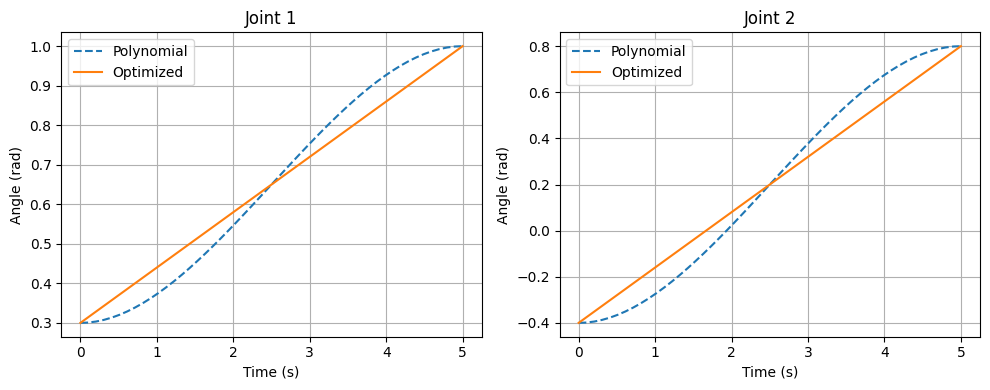

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(t, q1_poly, '--', label="Polynomial")
plt.plot(t, q1_opt, label="Optimized")
plt.title("Joint 1")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, q2_poly, '--', label="Polynomial")
plt.plot(t, q2_opt, label="Optimized")
plt.title("Joint 2")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
poly_cost = cost_function(np.concatenate([q1_poly, q2_poly]))
opt_cost = cost_function(np.concatenate([q1_opt, q2_opt]))

print("Polynomial trajectory cost:", poly_cost)
print("Optimized trajectory cost:", opt_cost)


Polynomial trajectory cost: 1.6644930912120053
Optimized trajectory cost: 9.73551685838398e-28


Optimization enhances the trajectory by selecting the joint motions in a way that there are fewer and fewer jerks in the motion. By reducing the sum of the joint accelerations, there are fewer jerks in the trajectory when it is optimized. This means there are fewer changes in the joint angles in the optimized trajectory than in the non-optimized ones. There is less mechanical stress caused by the smooth movements in the joints and actuators of the robot. By being able to track a specific goal in creating a trajectory, there is more optimal robot movement.